# Homework 4 CSCI443

This homework can be done either entirely in Jupyter or in Spark.

This particular homework does not require using Spark.  You may use Pandas.

The distribution of points across the problem is

In [15]:
25+15+35+25

100

## Part 1 Skewness

[25 pts total]

We mostly covered skewness empirically.  "Follow the tails" being a useful
mnemonic--—if the tail extends further to the left, the skewness is negative;
if it extends further to the right, the skewness is positive.

In most cases, a left (negative) skewed distribution is characterized by having
a mean that is less than the median, i.e., the heavy tail on the left has pulled
the mean to the left of the median.  Conversly, a right skewed distribuion is 
characterized by having a mean that is greater than the median.  We will not
encounter any distributions in this class where this is not true.  However, 
the relationship between the mean and median is merely a consequence, it isn't
the formal definition of skewness.  Skewness (\\(\gamma\\)) is most often defined 
as follows

$$\text{Skewness } \gamma = \frac{E[(X-\mu)^3]}{\sigma^3}$$

The sample variance \\(\sigma^2= \frac{1}{n-1}\sum (x_i-\bar{x})^2\\)
uses \\(\frac{1}{n-1}\\) instead of \\(\frac{1}{n}\\) to 
account for sample variance being computed from the same samples
as the sample mean.  

Sample Skewness (\\(G_1\\)) has a somewhat more complicated correction
to handle the bias introduced by computing the sample mean, sample
standard deviation, and sample skewness from the same samples.

$$G_1 = \frac{\sqrt{n(n-1)}}{n-2} \frac{1}{s^3} {\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}$$

where

  - \\(n\\) is the number of samples
  - \\(x_i\\) is the \\(i^{th}\\) sample.
  - \\(\bar{x}\\) is the sample mean.

\\(\frac{n}{(n-1)(n-2)}\\) includes the correction for the bias 
introduced by computing \\(\bar{x}\\), \\(s\\), and 
\\(G_1\\) from the same samples.  The derivation of this
correction is outside the scope of the course, but I welcome
the student to study it further should they wish.


**Problem 1** [5 pts] Create code in this notebook to compute the sample skewness.
Do not use the implementation in `scipy.stats`, except if you so desire to check
your answers against an existing implementation.

    def sample_skewness(samples) -> float:
      ...

      # $$\text{Skewness } \gamma = \frac{E[(X-\mu)^3]}{\sigma^3}$$

In [9]:
# ANSWER HERE


**Problem 2** [5 pts] Using pytest, write three unit tests in this
in this notebook.

The first unit test should confirm that your implementation of sample
skewness returns 0 for samples spread perfectly even across a range.
Your result should be allowed to be within 1e-15 of 0 due to the
limits imposed by floating-point precision.  Use the following to
populate the array

    arr = np.linspace(start=0, stop=10, num=5)
    
All symmetric distributions exhibit 0 skewness. 

Here is an example unit test using Python's built-in unittest module.
The specific unit tests are unrelated to the problem.  The purpose is
just to provide examples of the unittest framework:

    import unittest

    class TestMathOperations(unittest.TestCase):
        def test_addition(self):
            self.assertEqual(1 + 1, 2)

        def test_subtraction(self):
           self.assertEqual(5 - 2, 3)

    unittest.main(argv=[''], exit=False)

Write a second unit test that computes the skewness 

    arr2 = np.append(arr, 1000)

The result should be approximately 1.7885495.

Write a third unit test that confirms that your implementation returns \\(2 \pm 0.05\\)
for a sufficient number of samples drawn from an exponential random variable
with \\(\lambda=1\\).

In [ ]:
import unittest

class TestSkewness(unittest.TestCase):
    def test_zero_skew(self):
        arr = np.linspace(start=0, stop=10, num=5)

        # INSERT CODE HERE.

    def test_positive_skew(self):
        pass  # INSERT CODE HERE.

    def test_exponential_skew(self):
        pass

**Probem 3** [5 pts]

Skewness of a distribution is defined as

\\[ \gamma = \frac{E[(X - \mu)^3]}{\sigma^3} = \frac{1}{\sigma^3} \int_{-\infty}^{\infty} (x - \mu)^3 f(x) \, dx \\]

A triangular distribution is defined by three parameters.  It has the pdf

\\[
f(x) = \begin{cases} 
  0      & \text{if } x \leq a \\
  \frac{2\cdot(x-a)}{(b-a)(c-a)}& \text{if } a \leq x \leq c \\
  \frac{2\cdot(c-x)}{(b-a)(c-b)}& \text{if } c \leq x \leq b \\
  0 & \text{if } x \geq b \\
\end{cases}
\\]

where 

 * \\(a\\) is the left corner of the triangle, i.e., the lower bound
   of the distribution's pdf.   
 * \\(b\\) is the right corner of the triangle, i.e., the upper bound
   of the distribution's pdf.
 * \\(c\\) is at the peak of the triangle, i.e., the mode of the
   distribution's pdf.

An example triangular distribution is shown below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_triangular_distribution(a, b, c):
    """
    Plots a triangular distribution with labels for a, b, and c.
    The peak (c) must be between a and b.
    
    Parameters:
    - a: The minimum value of the distribution
    - b: The maximum value of the distribution
    - c: location of the mode (peak) of the distribution
    """
    assert a <= c <= b 
    
    # Define points for the triangular shape
    x = [a, c, b]
    h = 2 / (b-a)
    w = b-a
    y = [0, h, 0]
    
    # Plotting the triangular distribution
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, '-o', label='Triangular Distribution')
    
    # Annotating points a, b, and c
    plt.text(a - 0.025 * w, 0.05, 'a', ha='center', va='bottom', fontsize=12)
    plt.text(b + 0.025 * w, 0.05, 'b', ha='center', va='bottom', fontsize=12)
    plt.text(c, 1.05 * h, 'c', ha='center', va='bottom', fontsize=12)
    
    # Additional plot settings
    plt.fill_between(x, y, color='skyblue', alpha=0.5)
    plt.xlim([a - 0.1 * (b - a), b + 0.1 * (b - a)])
    plt.ylim([0, h * 1.15])
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Example Triangular Distribution')
    plt.grid(True)
    plt.show()




The mean of a triangular distribution is given by 

\\[ \mu = \frac{a + b + c}{3}\\]

A right triangular distribution with the peak on the right edge of the 
triangle has \\(b=c\\), as shown below.  The triangle is shifted to the 
left so that the mean resides at 0.

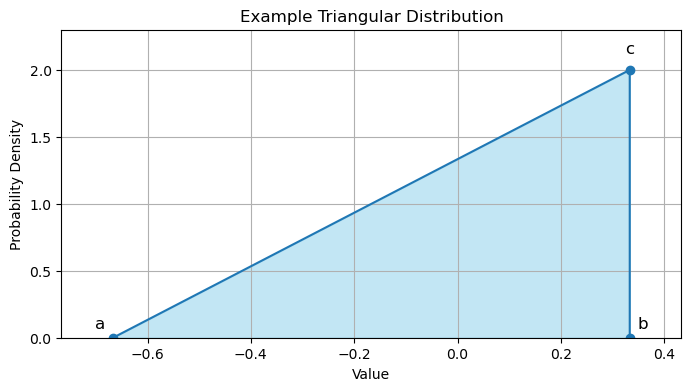

In [3]:
a, b, c = -2/3, 1/3, 1/3 
plot_triangular_distribution(a, b, c)

PDF of a right triangle distribution:

\\[ f(x) = \frac{2(x-a)}{(b-a)^2} \quad \text{for } a \leq x \leq b \\]

However, \\(b-a=1\\), \\(a=-2/3\\), and \\(b=1/3\\) causing the above to simplify

\\[ f(x) = 2(x-\frac{2}{3}) \quad \text{for } -\frac{2}{3} \leq x \leq \frac{1}{3} \\]

Derive the skewness for this distribution.

ANSWER HERE

**Problem 4** [5 pts]

Write code that generates 1000 samples obeying the triangular distribution given in Problem 3.

In [ ]:
#ANSWER HERE

**Problem 5** [5 pts]

Use the samples generated in Problem 4 to demonstrate that the sample skewness is close to the 
analytically derived distribution skewness from Problem 3.

In [ ]:
#ANSWER HERE

## Part 2 Hypothesis Testing

[15 points total]

**Problem 6**: [3 pts]

What does a significance level of 0.05 mean in hypothesis testing?  
- A) There is a 5% chance that the null hypothesis is true.  
- B) There is a 95% chance that the null hypothesis is false.  
- C) There is a 5% chance of making a Type I error (rejecting a true null hypothesis).  
- D) There is a 5% chance of making a Type II error (failing to reject a false null hypothesis).

**Answer:** HERE

---

**Problem 7**: [3 pts]

Which of the following is true about the relationship between the significance level (alpha) and the probability of a Type I error?  
- A) As alpha increases, the probability of a Type I error decreases.  
- B) As alpha increases, the probability of a Type I error increases.
- C) As alpha decreases, the probability of a Type I error increases.  
- D) There is no relationship between alpha and the probability of a Type I error.

**Answer:** HERE

---

**Problem 8**: [3 pts]

If a hypothesis test results in a p-value of 0.03 and the chosen significance level is 0.05, what should the researcher conclude?  
- A) Reject the null hypothesis, as the p-value is greater than the significance level.  
- B) Fail to reject the null hypothesis, as the p-value is greater than the significance level.  
- C) Reject the null hypothesis, as the p-value is less than the significance level.  
- D) Fail to reject the null hypothesis, as the p-value is less than the significance level.

**Answer:** HERE

---

**Problem 9**: [3 pts]

What happens when the significance level (alpha) is set too high in a hypothesis test?  
- A) The likelihood of committing a Type II (false negative) error increases.  
- B) The likelihood of committing a Type I (false positive) error decreases.  
- C) The test becomes too stringent, making it harder to reject the null hypothesis.  
- D) The likelihood of committing a Type I (false positive) error increases.

**Answer:** HERE

---

**Problem 10**: [3 pts]

Which of the following is true about the p-value in relation to the significance level?  
- A) A p-value greater than the significance level suggests that the null hypothesis should be rejected.  
- B) A p-value smaller than the significance level suggests that the null hypothesis cannot be rejected.  
- C) A p-value smaller than the significance level suggests that the null hypothesis should be rejected.  
- D) The p-value is irrelevant to hypothesis testing and significance level.

**Answer:** HERE

## Part 3 Pancakes, Eggs, and Table Heights in the Academy of Lagado

[35 points total]

**The Great Breakfast Debate**

During your visit to the flying island of Laputa, you find yourself at the Academy of Lagado— an institution known for its relentless pursuit of impractical science.  Two professors — Professor Eggsworth and Professor Flapjack — are engaged in a heated scientific rivalry.

Each claims to have discovered the secret to determining the ideal breakfast table height for a citizen of Lagado.
  * Professor Eggsworth believes that egg consumption per person predicts optimal table height.
  * Professor Flapjack insists it’s actually the number of pancakes consumed per person that determines how high a Lagadian table should be.

Each professor has gathered data across one hundred households, measuring the average daily consumption of eggs and pancakes, along with the Academy’s recommended breakfast table height (measured in Lagadian cubits).

Their calculating department chair recognizing the danger of standing in the crossfire turns to you, a sacrificable data scientist from Ole Miss, to settle the debate.

**Your Mission**

You are given a dataset `lagado_breakfast_data.csv` with the following columns:
  * eggs_per_person
  * pancakes_per_person
  * ideal_table_height

Your task is to determine:
  1. Which professor’s theory is statistically supported, if either.
  2. Whether the professors should be given tenure or permanently reassigned to the marble pillow division.

**Problem 11** [5 pts] Load and visualize the dataset using matplotlib. Create two scatterplots using matplotlib:
 * One of eggs_per_person vs ideal_table_height
 * One of pancakes_per_person vs ideal_table_height
 
Describe any visible trends.

In [ ]:
# ANSWER HERE

**Problem 12** [5 pts] For the eggs test and then the pancakes test:

  * State the null and alternative hypotheses for the case where we only want to know whether there is correlation (two-tailed)

ANSWER HERE

**Problem 13** [5 pts] Compute the Pearson correlation coefficient and associated p-value for each relationship:
 * Eggs vs Table Height
 * Pancakes vs Table Height
Report both r-values and p-values.

In [ ]:
# ANSWER HERE

**Problem 14** [5 pts] Determine whether the results are statistically significant at the α = 0.01 level.
 * Interpret the result in plain language. (Which professor, if any, is right?)

In [ ]:
# ANSWER HERE

**Problem 15** [5 pts] Restate the null and alternative hypotheses for the egg test and then the pancake test for the case where we are trying to determine whether there is statistically significant evidence of a positive correlation (one-tailed).  

Explain the difference between one and two tailed tests.

In [ ]:
# ANSWER HERE

**Problem 16** [5 pts] Compute the associated p-values for the given data under the given null hypotheses from Problem 15:
 * Eggs vs Table Height
 * Pancakes vs Table Height
Report both p-values.

In [ ]:
# ANSWER HERE

**Problem 17** [5 pts] Determine whether the tests described in Problem 15 and computed in Problem 16 are statistically significant at the α = 0.01 level.
 * Interpret the result in plain language.

In [ ]:
# ANSWER HERE

**Problem 18** [Bonus: 5 pts] The Lagadian government is considering funding a research grant to produce adjustable-height tables based on breakfast habits. Would you recommend this investment based on the evidence obtained so far? Support your recommendation with humor and statistics.

In [ ]:
# ANSWER HERE

## Part 4. A Lilliputian Statistical Crisis

[25 pts total]

For centuries, the proud nation of Lilliput has enforced the imperial edict that boiled eggs must be opened at the small end — a decree that led to the exile of the rebellious Big-Endians to the neighboring island of Blefuscu. This seemingly trivial matter has caused six rebellions, countless beheadings, and at least one naval war.

Recently, the Ministry of Tradition commissioned a poll to reinforce the cultural superiority of the Little-End way. Citizens of Lilliput and Blefuscu were asked privately which end they preferred to crack their eggs. The results shocked the establishment:
  * 52 out of 100 Lilliputians said they preferred the big end.
  * 36 out of 80 Blefuscudians said they preferred the big end.

Panic ensued. The High Chamber of Truthiness demanded a rigorous statistical analysis before launching another inquisition or rewriting the sacred breakfast scriptures.

**Your Mission:**

* Restore Order (or Confirm Chaos)

* Protect your head.

**Problem 19**. [5 pts] State the null hypothesis and alternative hypothesis to test whether the two populations (Lilliput and Blefuscu) significantly differ in their proportions of big-end preference.

ANSWER HERE

**Problem 20**. [5 pts] Calculate the sample proportions for each group. Which group appears to be more big-endian? Which group is supposed to be?

ANSWER HERE

**Problem 21**. [5 pts] Under the null hypothesis stated in Problem 19, calculate the pooled estimate of the proportion and the standard error. 

ANSWER HERE

**Problem 22** [5 pts] Assume that the sampling distribution of the sample
proportion is reasonably approximated by a normal (Gaussian) distribution.
Then compute the z-score and corresponding p-value for the difference in sample
proportions.

In [ ]:
ANSWER HERE

**Problem 23**. [5 pts] At a 5% significance level, can the High Chamber reject the null hypothesis and declare a statistically meaningful betrayal of Lilliputian values? Justify your answer.

ANSWER HERE